<a href="https://colab.research.google.com/github/KiratSinghWalia/reinforcement-learning/blob/main/Portfolio_Optimization_using_FinRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 2s (475 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
de

In [ ]:
import pandas
!pip install pandas-market-calendars
!pip install torch_geometric

In [ ]:
!pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [ ]:
import torch

from sklearn.preprocessing import MaxAbsScaler

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import GroupByScaler
from finrl.meta.env_portfolio_optimization.env_portfolio_optimization import PortfolioOptimizationEnv
from finrl.agents.portfolio_optimization.models import DRLAgent
from finrl.agents.portfolio_optimization.architectures import EIIE

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [ ]:
TOP_SP500 = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG",
    "NVDA", "TSLA", "JPM", "JNJ",
    "V", "PG", "HD", "MA", "UNH"
]

In [ ]:
print(len(TOP_SP500))

portfolio_raw_df = YahooDownloader(start_date = '2011-01-01',
                                end_date = '2024-12-31',
                                ticker_list = TOP_SP500).fetch_data()
portfolio_raw_df

14
YF deprecation warning: set proxy via new config function: yf.set_config(proxy=proxy)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (49294, 8)


Price,date,close,high,low,open,volume,tic,day
0,2011-01-03,9.904955,9.925692,9.762799,9.786842,445138400,AAPL,0
1,2011-01-03,9.211000,9.300000,9.060500,9.068500,106628000,AMZN,0
2,2011-01-03,14.981371,15.012109,14.786280,14.786280,94962614,GOOG,0
3,2011-01-03,15.051911,15.082795,14.855901,14.855901,94513392,GOOGL,0
4,2011-01-03,25.312458,25.498841,25.226432,25.233603,7464300,HD,0
...,...,...,...,...,...,...,...,...
49289,2024-12-30,137.477356,140.257099,134.007674,134.817597,167734700,NVDA,0
49290,2024-12-30,165.048492,166.915400,164.673146,166.609190,4354500,PG,0
49291,2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000,TSLA,0
49292,2024-12-30,505.639069,507.560879,498.529468,504.703066,5408600,UNH,0


In [ ]:
portfolio_raw_df.groupby("tic").count()

Price,date,close,high,low,open,volume,day
tic,,,,,,,
AAPL,3521,3521,3521,3521,3521,3521,3521
AMZN,3521,3521,3521,3521,3521,3521,3521
GOOG,3521,3521,3521,3521,3521,3521,3521
GOOGL,3521,3521,3521,3521,3521,3521,3521
HD,3521,3521,3521,3521,3521,3521,3521
JNJ,3521,3521,3521,3521,3521,3521,3521
JPM,3521,3521,3521,3521,3521,3521,3521
MA,3521,3521,3521,3521,3521,3521,3521
MSFT,3521,3521,3521,3521,3521,3521,3521


In [ ]:
portfolio_norm_df = GroupByScaler(by="tic", scaler=MaxAbsScaler).fit_transform(portfolio_raw_df)
portfolio_norm_df

Price,date,close,high,low,open,volume,tic,day
0,2011-01-03,0.038332,0.038253,0.037986,0.037997,0.236650,AAPL,0.0
1,2011-01-03,0.039544,0.039914,0.039737,0.039023,0.220906,AMZN,0.0
2,2011-01-03,0.075689,0.074079,0.075261,0.074564,0.168417,GOOG,0.0
3,2011-01-03,0.076626,0.074969,0.076280,0.075402,0.168417,GOOGL,0.0
4,2011-01-03,0.059052,0.058711,0.059310,0.058734,0.196186,HD,0.0
...,...,...,...,...,...,...,...,...
49289,2024-12-30,0.923559,0.917520,0.916377,0.902841,0.045421,NVDA,0.0
49290,2024-12-30,0.929827,0.936540,0.932748,0.937055,0.035192,PG,0.0
49291,2024-12-30,0.869858,0.874033,0.908723,0.881278,0.071045,TSLA,0.0
49292,2024-12-30,0.815270,0.811259,0.818641,0.821208,0.197673,UNH,0.0


In [ ]:
df_portfolio = portfolio_norm_df[["date", "tic", "close", "high", "low"]]

df_portfolio_train = df_portfolio[(df_portfolio["date"] >= "2011-01-01") & (df_portfolio["date"] < "2021-12-31")]
df_portfolio_2022 = df_portfolio[(df_portfolio["date"] >= "2021-01-01") & (df_portfolio["date"] < "2022-12-31")]
df_portfolio_2023 = df_portfolio[(df_portfolio["date"] >= "2022-01-01") & (df_portfolio["date"] < "2023-12-31")]
df_portfolio_2024 = df_portfolio[(df_portfolio["date"] >= "2023-01-01") & (df_portfolio["date"] < "2024-12-31")]

In [ ]:
environment = PortfolioOptimizationEnv(
        df_portfolio_train,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=50,
        features=["close", "high", "low"],
        normalize_df=None
    )

In [ ]:

model_kwargs = {
    "lr": 0.01,
    "policy": EIIE,
}


policy_kwargs = {
    "k_size": 3,
    "time_window": 50,
}

model = DRLAgent(environment).get_model("pg", device, model_kwargs, policy_kwargs)

In [ ]:
DRLAgent.train_model(model, episodes=40)


  0%|          | 0/40 [00:00<?, ?it/s]

Initial portfolio value:100000
Final portfolio value: 6856366.5
Final accumulative portfolio value: 68.56366729736328
Maximum DrawDown: -0.41726864837158206
Sharpe ratio: 1.4572883796109082


  2%|▎         | 1/40 [00:48<31:28, 48.41s/it]

Initial portfolio value:100000
Final portfolio value: 21514276.0
Final accumulative portfolio value: 215.14276123046875
Maximum DrawDown: -0.3903286545663085
Sharpe ratio: 1.5656477524690302


  5%|▌         | 2/40 [01:36<30:41, 48.47s/it]

Initial portfolio value:100000
Final portfolio value: 25313938.0
Final accumulative portfolio value: 253.13937377929688
Maximum DrawDown: -0.3784405183135484
Sharpe ratio: 1.5404746342502709


  8%|▊         | 3/40 [02:25<29:52, 48.45s/it]

Initial portfolio value:100000
Final portfolio value: 26519864.0
Final accumulative portfolio value: 265.1986389160156
Maximum DrawDown: -0.37742084342383864
Sharpe ratio: 1.5312317998351108


 10%|█         | 4/40 [03:13<29:05, 48.50s/it]

Initial portfolio value:100000
Final portfolio value: 25352324.0
Final accumulative portfolio value: 253.5232391357422
Maximum DrawDown: -0.3767201405952483
Sharpe ratio: 1.519892015153075


 12%|█▎        | 5/40 [04:01<28:04, 48.13s/it]

Initial portfolio value:100000
Final portfolio value: 26740986.0
Final accumulative portfolio value: 267.40985107421875
Maximum DrawDown: -0.37668528500020193
Sharpe ratio: 1.5225033467585127


 15%|█▌        | 6/40 [04:49<27:10, 47.95s/it]

Initial portfolio value:100000
Final portfolio value: 20857208.0
Final accumulative portfolio value: 208.57208251953125
Maximum DrawDown: -0.3760486449828634
Sharpe ratio: 1.4784319140798157


 18%|█▊        | 7/40 [05:37<26:31, 48.24s/it]

Initial portfolio value:100000
Final portfolio value: 25532352.0
Final accumulative portfolio value: 255.32351684570312
Maximum DrawDown: -0.3762978279677037
Sharpe ratio: 1.5129726077541743


 20%|██        | 8/40 [06:25<25:34, 47.96s/it]

Initial portfolio value:100000
Final portfolio value: 27060216.0
Final accumulative portfolio value: 270.6021728515625
Maximum DrawDown: -0.37628539677937933
Sharpe ratio: 1.5195606320006356


 22%|██▎       | 9/40 [07:13<24:49, 48.06s/it]

Initial portfolio value:100000
Final portfolio value: 20525024.0
Final accumulative portfolio value: 205.250244140625
Maximum DrawDown: -0.37582272951263684
Sharpe ratio: 1.4724557002811256


 25%|██▌       | 10/40 [08:02<24:06, 48.21s/it]

Initial portfolio value:100000
Final portfolio value: 25027800.0
Final accumulative portfolio value: 250.2779998779297
Maximum DrawDown: -0.37599831767214964
Sharpe ratio: 1.5088459380993324


 28%|██▊       | 11/40 [08:51<23:29, 48.62s/it]

Initial portfolio value:100000
Final portfolio value: 26842702.0
Final accumulative portfolio value: 268.4270324707031
Maximum DrawDown: -0.3763218049764607
Sharpe ratio: 1.5146619445803875


 30%|███       | 12/40 [09:41<22:53, 49.04s/it]

Initial portfolio value:100000
Final portfolio value: 18568030.0
Final accumulative portfolio value: 185.6802978515625
Maximum DrawDown: -0.37553602015240806
Sharpe ratio: 1.4594118895683161


 32%|███▎      | 13/40 [10:34<22:39, 50.35s/it]

Initial portfolio value:100000
Final portfolio value: 19444120.0
Final accumulative portfolio value: 194.44119262695312
Maximum DrawDown: -0.37568206671297355
Sharpe ratio: 1.4626339209088268


 35%|███▌      | 14/40 [11:24<21:40, 50.04s/it]

Initial portfolio value:100000
Final portfolio value: 20395108.0
Final accumulative portfolio value: 203.95108032226562
Maximum DrawDown: -0.3757946707170037
Sharpe ratio: 1.4694349832797944


 38%|███▊      | 15/40 [12:13<20:46, 49.84s/it]

Initial portfolio value:100000
Final portfolio value: 24445000.0
Final accumulative portfolio value: 244.4499969482422
Maximum DrawDown: -0.376124416588168
Sharpe ratio: 1.5053486228306965


 40%|████      | 16/40 [13:02<19:51, 49.63s/it]

Initial portfolio value:100000
Final portfolio value: 28030860.0
Final accumulative portfolio value: 280.30859375
Maximum DrawDown: -0.3762378430386133
Sharpe ratio: 1.5260662243366427


 42%|████▎     | 17/40 [13:50<18:47, 49.03s/it]

Initial portfolio value:100000
Final portfolio value: 21543112.0
Final accumulative portfolio value: 215.43112182617188
Maximum DrawDown: -0.3756241844860747
Sharpe ratio: 1.4830190377477879


 45%|████▌     | 18/40 [14:38<17:50, 48.65s/it]

Initial portfolio value:100000
Final portfolio value: 25710726.0
Final accumulative portfolio value: 257.1072692871094
Maximum DrawDown: -0.376073027223092
Sharpe ratio: 1.520602746555041


 48%|████▊     | 19/40 [15:27<17:02, 48.70s/it]

Initial portfolio value:100000
Final portfolio value: 28174974.0
Final accumulative portfolio value: 281.7497253417969
Maximum DrawDown: -0.37596072656272683
Sharpe ratio: 1.5264487778910818


 50%|█████     | 20/40 [16:18<16:31, 49.59s/it]

Initial portfolio value:100000
Final portfolio value: 24109790.0
Final accumulative portfolio value: 241.097900390625
Maximum DrawDown: -0.3756402980195802
Sharpe ratio: 1.5029650259841938


 52%|█████▎    | 21/40 [17:12<16:05, 50.83s/it]

Initial portfolio value:100000
Final portfolio value: 28332258.0
Final accumulative portfolio value: 283.32257080078125
Maximum DrawDown: -0.37591468291177776
Sharpe ratio: 1.5273057958869833


 55%|█████▌    | 22/40 [18:05<15:28, 51.59s/it]

Initial portfolio value:100000
Final portfolio value: 28088850.0
Final accumulative portfolio value: 280.88848876953125
Maximum DrawDown: -0.3757084107190236
Sharpe ratio: 1.5279437767600155


 57%|█████▊    | 23/40 [18:58<14:41, 51.86s/it]

Initial portfolio value:100000
Final portfolio value: 28735530.0
Final accumulative portfolio value: 287.35528564453125
Maximum DrawDown: -0.3758878233195174
Sharpe ratio: 1.5319409716667276


 60%|██████    | 24/40 [19:50<13:52, 52.06s/it]

Initial portfolio value:100000
Final portfolio value: 28504092.0
Final accumulative portfolio value: 285.0409240722656
Maximum DrawDown: -0.37566868296025147
Sharpe ratio: 1.5321634859938105


 62%|██████▎   | 25/40 [20:45<13:11, 52.75s/it]

Initial portfolio value:100000
Final portfolio value: 29131534.0
Final accumulative portfolio value: 291.3153381347656
Maximum DrawDown: -0.3757178274553412
Sharpe ratio: 1.535974011368435


 65%|██████▌   | 26/40 [21:38<12:20, 52.86s/it]

Initial portfolio value:100000
Final portfolio value: 28951130.0
Final accumulative portfolio value: 289.51129150390625
Maximum DrawDown: -0.3756281413349688
Sharpe ratio: 1.5365274376018234


 68%|██████▊   | 27/40 [22:30<11:24, 52.66s/it]

Initial portfolio value:100000
Final portfolio value: 29549932.0
Final accumulative portfolio value: 295.49932861328125
Maximum DrawDown: -0.3756870407800651
Sharpe ratio: 1.5401053694333378


 70%|███████   | 28/40 [23:22<10:28, 52.35s/it]

Initial portfolio value:100000
Final portfolio value: 29249526.0
Final accumulative portfolio value: 292.4952697753906
Maximum DrawDown: -0.3756084795186444
Sharpe ratio: 1.540174932455686


 72%|███████▎  | 29/40 [24:14<09:34, 52.24s/it]

Initial portfolio value:100000
Final portfolio value: 29991192.0
Final accumulative portfolio value: 299.91192626953125
Maximum DrawDown: -0.37567123989984263
Sharpe ratio: 1.5443681307158914


 75%|███████▌  | 30/40 [25:06<08:43, 52.37s/it]

Initial portfolio value:100000
Final portfolio value: 29845012.0
Final accumulative portfolio value: 298.45013427734375
Maximum DrawDown: -0.3755885969520163
Sharpe ratio: 1.5456763829770452


 78%|███████▊  | 31/40 [25:58<07:49, 52.12s/it]

Initial portfolio value:100000
Final portfolio value: 30245134.0
Final accumulative portfolio value: 302.45135498046875
Maximum DrawDown: -0.37559116755898403
Sharpe ratio: 1.5468389693717066


 80%|████████  | 32/40 [26:48<06:51, 51.46s/it]

Initial portfolio value:100000
Final portfolio value: 29658478.0
Final accumulative portfolio value: 296.58477783203125
Maximum DrawDown: -0.3764252740471884
Sharpe ratio: 1.5461650341797073


 82%|████████▎ | 33/40 [27:39<05:59, 51.35s/it]

Initial portfolio value:100000
Final portfolio value: 30912484.0
Final accumulative portfolio value: 309.1248474121094
Maximum DrawDown: -0.37659212622083527
Sharpe ratio: 1.5519387415068784


 85%|████████▌ | 34/40 [28:29<05:06, 51.13s/it]

Initial portfolio value:100000
Final portfolio value: 29930882.0
Final accumulative portfolio value: 299.3088073730469
Maximum DrawDown: -0.3758130495049786
Sharpe ratio: 1.5495338020397251


 88%|████████▊ | 35/40 [29:19<04:13, 50.68s/it]

Initial portfolio value:100000
Final portfolio value: 31520056.0
Final accumulative portfolio value: 315.2005615234375
Maximum DrawDown: -0.37683179970651326
Sharpe ratio: 1.5576668724113933


 90%|█████████ | 36/40 [30:09<03:21, 50.47s/it]

Initial portfolio value:100000
Final portfolio value: 31795596.0
Final accumulative portfolio value: 317.9559631347656
Maximum DrawDown: -0.37569093132197173
Sharpe ratio: 1.561282927498334


 92%|█████████▎| 37/40 [30:59<02:30, 50.25s/it]

Initial portfolio value:100000
Final portfolio value: 32253594.0
Final accumulative portfolio value: 322.53594970703125
Maximum DrawDown: -0.375521405338322
Sharpe ratio: 1.564910209159682


 95%|█████████▌| 38/40 [31:48<01:39, 49.84s/it]

Initial portfolio value:100000
Final portfolio value: 32576736.0
Final accumulative portfolio value: 325.7673645019531
Maximum DrawDown: -0.3754829439521459
Sharpe ratio: 1.5680700271258465


 98%|█████████▊| 39/40 [32:36<00:49, 49.36s/it]

Initial portfolio value:100000
Final portfolio value: 33022822.0
Final accumulative portfolio value: 330.22821044921875
Maximum DrawDown: -0.37545982117856314
Sharpe ratio: 1.5717619052960377


100%|██████████| 40/40 [33:27<00:00, 50.19s/it]


In [ ]:
torch.save(model.train_policy.state_dict(), "policy_EIIE.pt")

In [ ]:
environment_2022= PortfolioOptimizationEnv(
    df_portfolio_2022,
    initial_amount=100000,
    comission_fee_pct=0.0025,
    time_window=50,
    features=["close", "high", "low"],
    normalize_df=None
)

environment_2023 = PortfolioOptimizationEnv(
    df_portfolio_2023,
    initial_amount=100000,
    comission_fee_pct=0.0025,
    time_window=50,
    features=["close", "high", "low"],
    normalize_df=None
)

environment_2024 = PortfolioOptimizationEnv(
    df_portfolio_2024,
    initial_amount=100000,
    comission_fee_pct=0.0025,
    time_window=50,
    features=["close", "high", "low"],
    normalize_df=None
)

In [ ]:
EIIE_results = {
    "training": environment._asset_memory["final"],
    "2022": {},
    "2023": {},
    "2024": {}
}

# instantiate an architecture with the same arguments used in training
# and load with load_state_dict.
policy = EIIE(time_window=50, device=device)
policy.load_state_dict(torch.load("policy_EIIE.pt"))

# 2022
DRLAgent.DRL_validation(model, environment_2022, policy=policy)
EIIE_results["2022"]["value"] = environment_2022._asset_memory["final"]

# 2023
DRLAgent.DRL_validation(model, environment_2023, policy=policy)
EIIE_results["2023"]["value"] = environment_2023._asset_memory["final"]

# 2024
DRLAgent.DRL_validation(model, environment_2024, policy=policy)
EIIE_results["2024"]["value"] = environment_2024._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 110071.3046875
Final accumulative portfolio value: 1.1007130146026611
Maximum DrawDown: -0.6634730978783475
Sharpe ratio: 0.3711497316704456
Initial portfolio value:100000
Final portfolio value: 200597.71875
Final accumulative portfolio value: 2.005977153778076
Maximum DrawDown: -0.6065291074639858
Sharpe ratio: 1.0014034643784637
Initial portfolio value:100000
Final portfolio value: 259001.609375
Final accumulative portfolio value: 2.5900161266326904
Maximum DrawDown: -0.0906047957684124
Sharpe ratio: 2.237870917228237


In [ ]:
UBAH_results = {
    "train": {},
    "2022": {},
    "2023": {},
    "2024": {}
}

PORTFOLIO_SIZE = len(TOP_SP500)

# train period
terminated = False
environment.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment.step(action)
UBAH_results["train"]["value"] = environment._asset_memory["final"]


terminated = False
environment_2022.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_2022.step(action)
UBAH_results["2022"]["value"] = environment_2022._asset_memory["final"]


terminated = False
environment_2023.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_2023.step(action)
UBAH_results["2023"]["value"] = environment_2023._asset_memory["final"]


terminated = False
environment_2024.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_2024.step(action)
UBAH_results["2024"]["value"] = environment_2024._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 1861729.5
Final accumulative portfolio value: 18.617294311523438
Maximum DrawDown: -0.3242833725422005
Sharpe ratio: 1.4861304835461728
Initial portfolio value:100000
Final portfolio value: 99302.859375
Final accumulative portfolio value: 0.9930285811424255
Maximum DrawDown: -0.28265716890327564
Sharpe ratio: 0.09958494863142232
Initial portfolio value:100000
Final portfolio value: 123482.2734375
Final accumulative portfolio value: 1.2348227500915527
Maximum DrawDown: -0.258414511684543
Sharpe ratio: 0.6323316056942755
Initial portfolio value:100000
Final portfolio value: 183890.65625
Final accumulative portfolio value: 1.8389065265655518
Maximum DrawDown: -0.09064643899612757
Sharpe ratio: 2.511007183707975


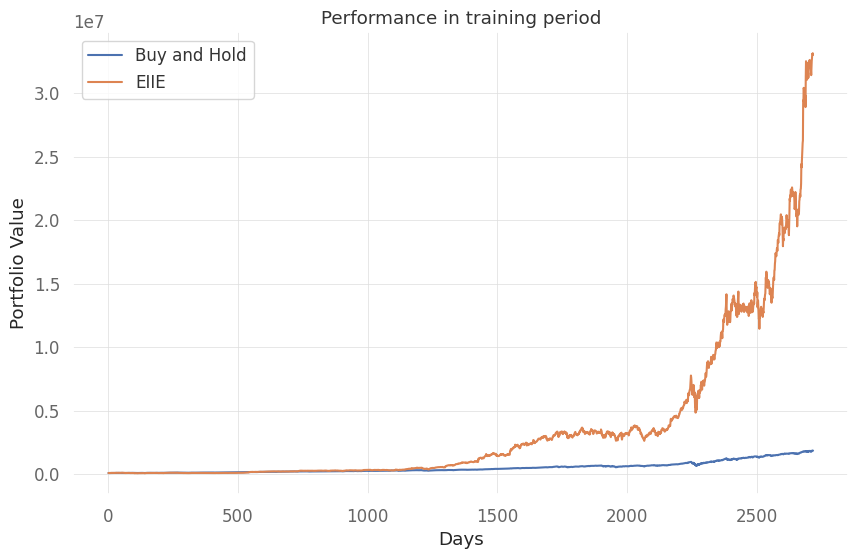

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(UBAH_results["train"]["value"], label="Buy and Hold")
plt.plot(EIIE_results["training"], label="EIIE")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in training period")
plt.legend()

plt.show()

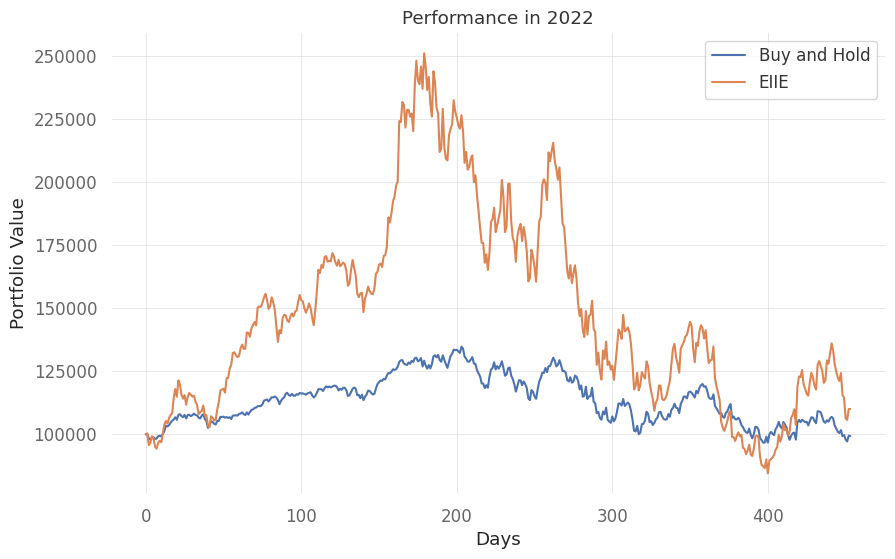

In [ ]:
plt.plot(UBAH_results["2022"]["value"], label="Buy and Hold")
plt.plot(EIIE_results["2022"]["value"], label="EIIE")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in 2022")
plt.legend()

plt.show()

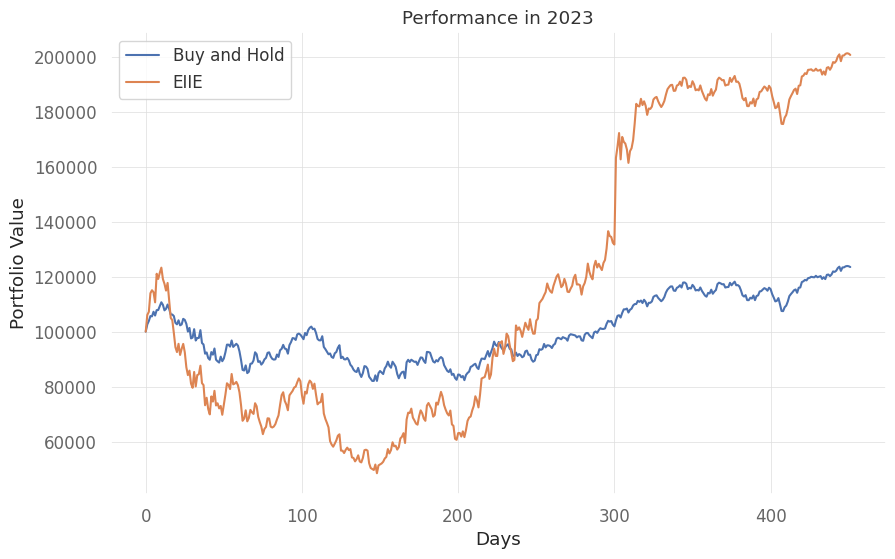

In [ ]:
plt.plot(UBAH_results["2023"]["value"], label="Buy and Hold")
plt.plot(EIIE_results["2023"]["value"], label="EIIE")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in 2023")
plt.legend()

plt.show()

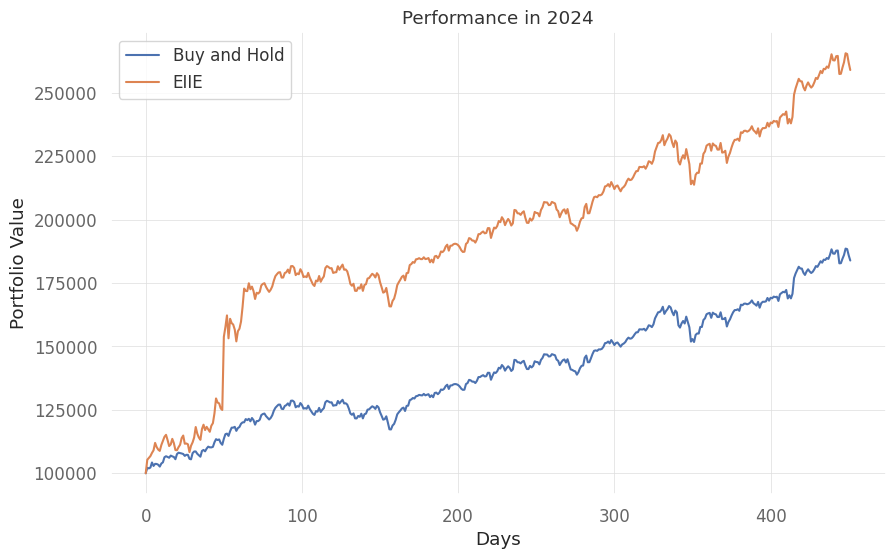

In [ ]:
plt.plot(UBAH_results["2024"]["value"], label="Buy and Hold")
plt.plot(EIIE_results["2024"]["value"], label="EIIE")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in 2024")
plt.legend()

plt.show()